# Objective:
To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

Key Questions:
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

# 1.  Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data

In [16]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [11]:
custData = pd.read_excel("Credit Card Customer Data.xlsx")

In [12]:
custData.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [13]:
custData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [14]:
custDataAttr=custData.iloc[:,2:]
custDataAttr.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [19]:
custDataAttr.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


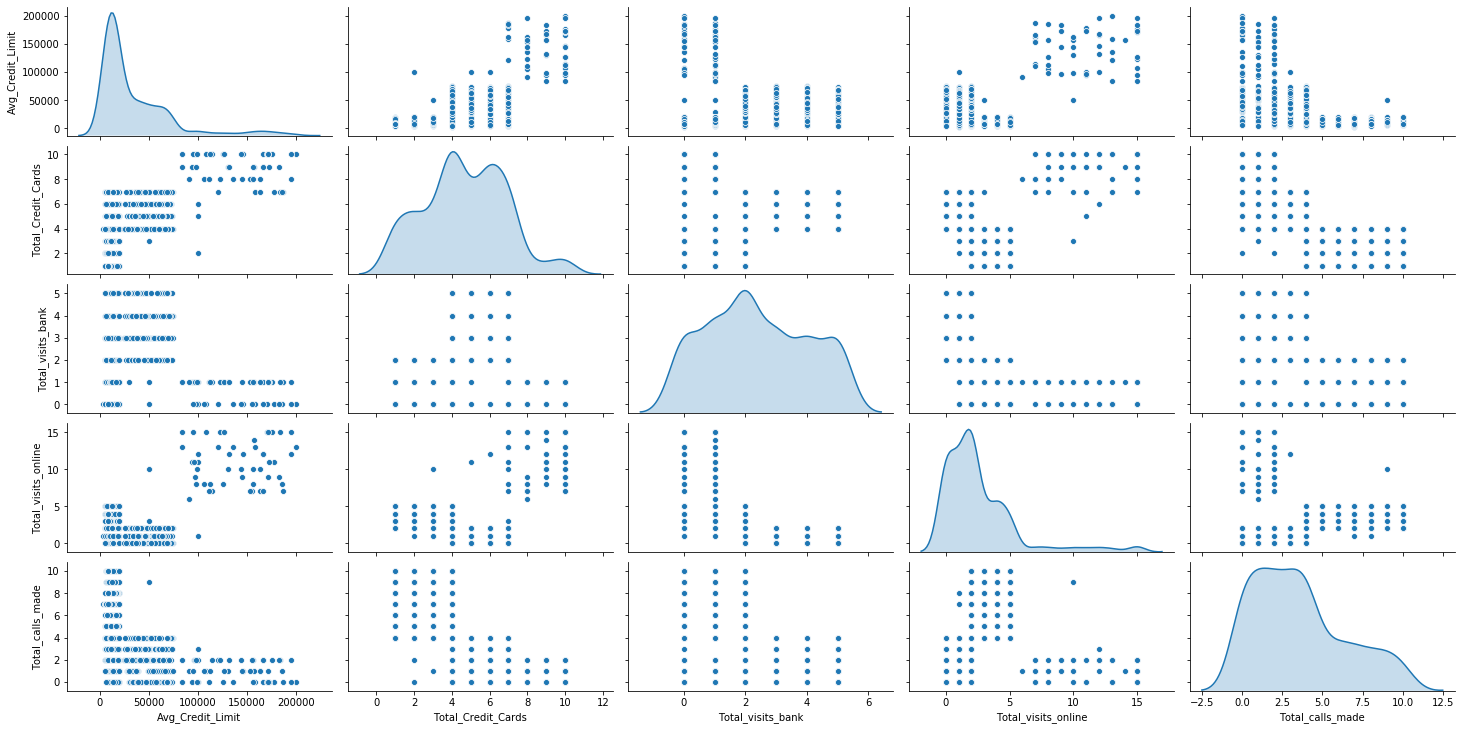

In [22]:
sns.pairplot(custDataAttr, height=2,aspect=2 , diag_kind='kde')

# 2.  Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs

In [ ]:
#1. The Average Credit limit is of different unit, so it better to scale to avoid too much importance to Average Credit limit
#2. Based on the the Kde plots , we can work with 3 or 4 clusters
#3. S.no and Customer Key are not relevant to the model, so removed it
#4. Standard distribution also not so high

In [76]:
#Applying Scale to reduce the importance
custDataScaled=custDataAttr.apply(zscore)
custDataScaled.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,-0.774809
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,0.803506
2,0.410293,1.058973,-0.860451,0.134290,0.145528,-0.774809
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,-0.774809
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2.381821
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593,0.803506
6,1.740187,0.135694,-1.473731,2.861408,-0.553005,2.381821
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271,0.803506
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005,0.803506
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326,0.803506


# 3.  Execute K-means clustering use elbow plot and analyse clusters using boxplot

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

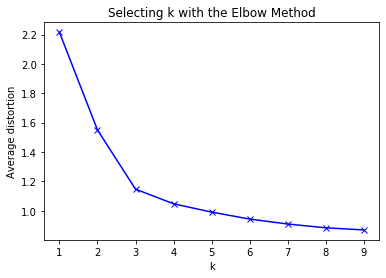

In [77]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(custDataScaled)
    prediction=model.predict(custDataScaled)
    meanDistortions.append(sum(np.min(cdist(custDataScaled, model.cluster_centers_, 'euclidean'), axis=1)) / custDataScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [93]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(custDataScaled)
prediction=final_model.predict(custDataScaled)

#Append the prediction 
custData["GROUP"] = prediction
custDataScaled["GROUP"] = prediction
print("Groups Assigned : \n")
custData.head()

Groups Assigned : 



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1,87073,100000,2,1,1,0,1
1,2,38414,50000,3,0,10,9,2
2,3,17341,50000,7,1,3,4,1
3,4,40496,30000,5,1,1,4,1
4,5,47437,100000,6,0,12,3,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011A0C34FA08>,
      dtype=object)

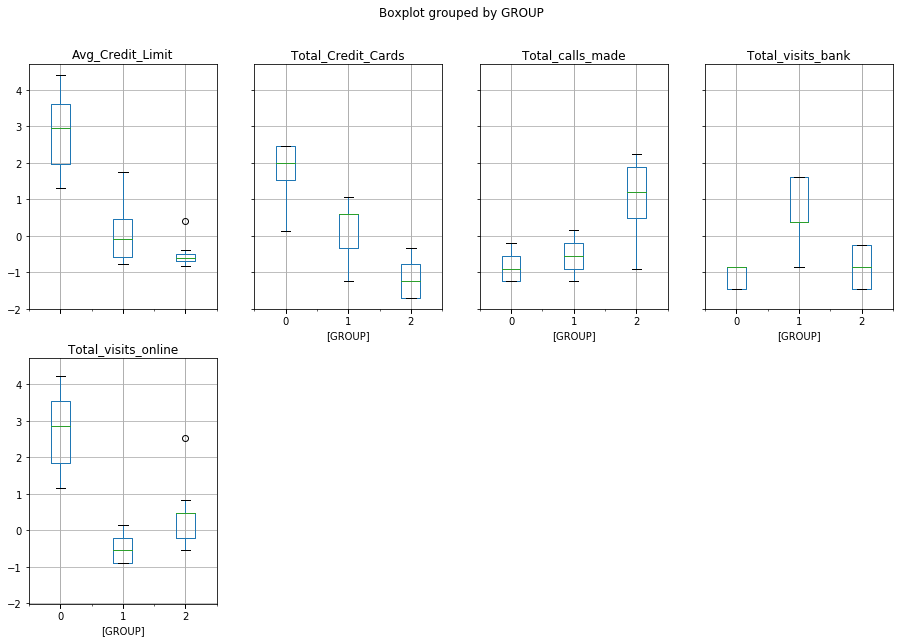

In [137]:
custDataScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

# 3.  Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot

In [98]:
custDataAttr=custData.iloc[:,2:]
custDataAttr.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,1
1,50000,3,0,10,9,2
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,0


In [99]:
custDataScaled_hc=custDataAttr.apply(zscore)
custDataScaled_hc.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,-0.448424
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1.252494
2,0.410293,1.058973,-0.860451,0.134290,0.145528,-0.448424
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,-0.448424
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,-2.149342
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593,1.252494
6,1.740187,0.135694,-1.473731,2.861408,-0.553005,-2.149342
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271,1.252494
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005,1.252494
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326,1.252494


In [113]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
#Hierarchical with Average
Z_ward = linkage(custDataScaled_hc, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z_ward , pdist(custDataScaled_hc))

c

0.7773493163855107

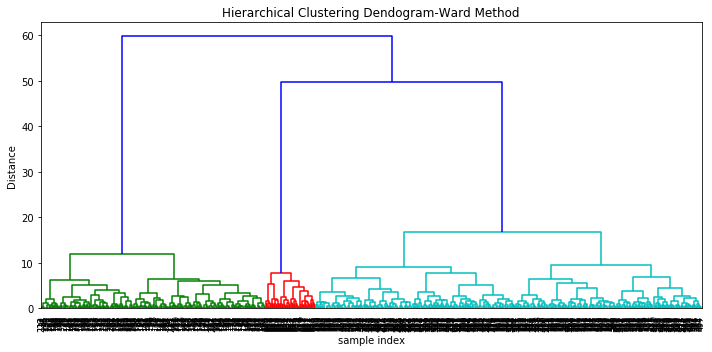

In [114]:
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendogram-Ward Method')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_ward, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [118]:
Z_complete = linkage(custDataScaled_hc, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z_average , pdist(custDataScaled_hc))

c

0.90207557800302

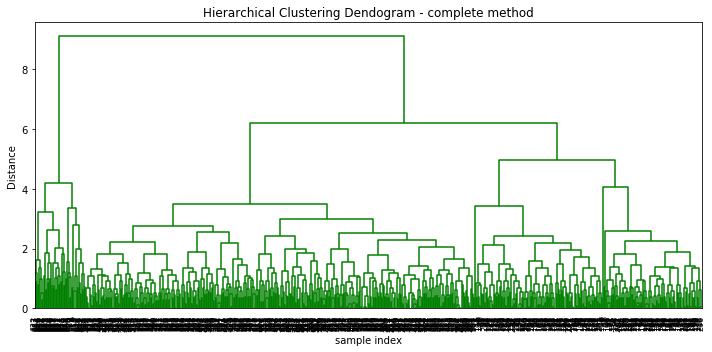

In [119]:
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendogram - complete method')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_complete, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [ ]:
#The Correlation for complete method is much better than ward, since it's closer to 1.

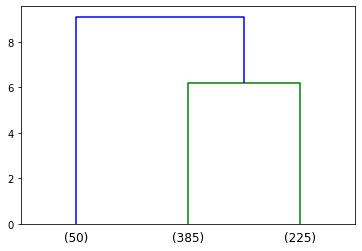

In [120]:
dendrogram(Z_complete, truncate_mode='lastp',p=3 )
plt.show()

In [134]:
from sklearn.cluster import AgglomerativeClustering
cluster_hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  
predict_hc = cluster_hc.fit_predict(custDataScaled_hc)

In [135]:
custDataScaled_hc["GROUP"] = predict_hc
custDataScaled_hc.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,2
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011A0ACE2488>,
      dtype=object)

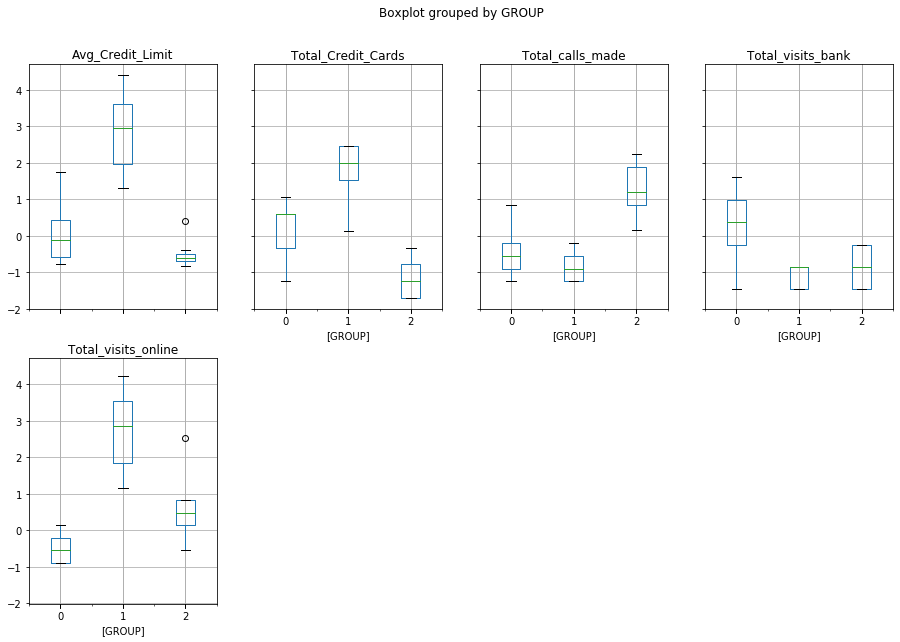

In [136]:
custDataScaled_hc.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

# 5.  Calculate average silhouette score for both methods

In [107]:
from sklearn.metrics import silhouette_score
clusters=range(2,10)
for n_clusters in clusters:
    model=KMeans(n_clusters=n_clusters)
    model.fit(custDataScaled)
    prediction=model.predict(custDataScaled)
    centers = model.cluster_centers_
    score = silhouette_score(custDataScaled,prediction,metric='euclidean')
    print('For n_clusters = {}, silhouette score is {}' .format(n_clusters,score))

For n_clusters = 2, silhouette score is 0.44557166438863355
For n_clusters = 3, silhouette score is 0.5397786437631975
For n_clusters = 4, silhouette score is 0.36712911456382386
For n_clusters = 5, silhouette score is 0.2754502769516372
For n_clusters = 6, silhouette score is 0.259933496403676
For n_clusters = 7, silhouette score is 0.2531211736713186
For n_clusters = 8, silhouette score is 0.23045383665062322
For n_clusters = 9, silhouette score is 0.22032853210966338


In [129]:
max_d = 3
from scipy.cluster.hierarchy import fcluster
clusters_complete = fcluster (Z_complete, max_d,criterion='distance')

In [127]:
from sklearn.metrics import silhouette_score
silhouette_score(custDataScaled_hc,clusters_complete)

0.3591371411508203

In [ ]:
#Silhouette Score for Both K-means and Hierarchy, if ncluster is 3 and max_d is 3 is very similar, so we can use either method

# 6.  Compare K-means clusters with Hierarchical clusters

In [147]:
custDataScaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Avg_Credit_Limit     660 non-null    float64
 1   Total_Credit_Cards   660 non-null    float64
 2   Total_visits_bank    660 non-null    float64
 3   Total_visits_online  660 non-null    float64
 4   Total_calls_made     660 non-null    float64
 5   GROUP                660 non-null    int32  
dtypes: float64(5), int32(1)
memory usage: 28.5 KB


In [149]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(custDataScaled, x='Avg_Credit_Limit', y='Total_Credit_Cards', z='Total_visits_online',color='GROUP')
fig.show()

In [150]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(custDataScaled_hc, x='Avg_Credit_Limit', y='Total_Credit_Cards', z='Total_visits_online',color='GROUP')
fig.show()

# 7.  Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions

In [ ]:
#How many different segments of customers are there? - 3 Different Segments of customers

#How are these segments different from each other? - 
#Visiting Bank vs Online, Customer with more than one credit Cards , Card Limit

#What are your recommendations to the bank on how to better market to and service these customers? 
#Customers who visit bank seems to have more credit cards and they can targeted, improve on online campign